In [223]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [224]:
salaryDf_test = pd.read_csv('SalaryData_Test.csv', encoding="latin-1")
salaryDf_train = pd.read_csv('SalaryData_Train.csv', encoding="latin-1")

# EDA

In [225]:
salaryDf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [226]:
salaryDf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [227]:
salaryDf_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [228]:
salaryDf_train.corr(numeric_only=True)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


<Axes: >

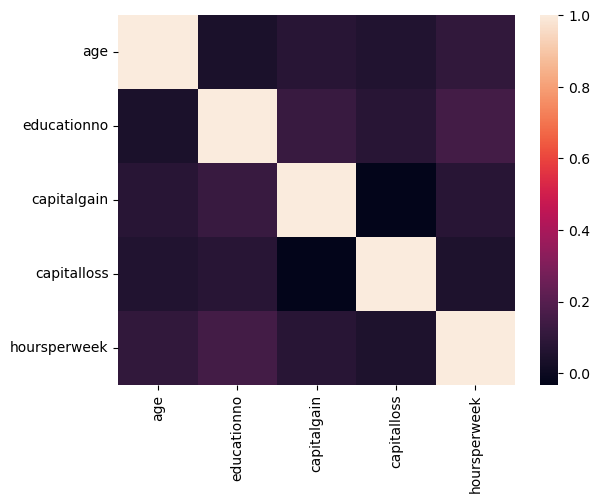

In [229]:
sns.heatmap(salaryDf_train.corr(numeric_only=True))

In [230]:
salaryDf_test.corr(numeric_only=True)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


There is no strong correlaation between variables

<Axes: xlabel='Salary', ylabel='Count'>

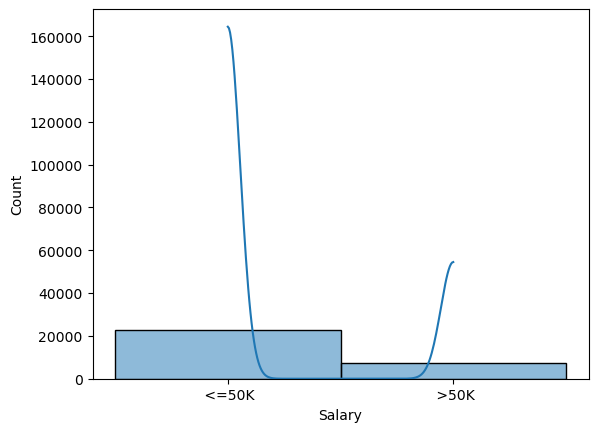

In [231]:
sns.histplot(data=salaryDf_train, x="Salary", kde=True)

In [232]:
salaryDf_train.shape

(30161, 14)

In [233]:
salaryDf_test.shape

(15060, 14)

In [234]:
salaryDf_train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Salary is tthe target variable

In [235]:
salaryDf_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [236]:
salaryDf_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [237]:
salaryDf_train.workclass.value_counts()

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

In [238]:
x_train = salaryDf_train.drop(columns="Salary")

In [239]:
x_test = salaryDf_test.drop(columns="Salary")

In [240]:
y_train = salaryDf_train["Salary"]

In [241]:
y_test = salaryDf_test["Salary"]

In [242]:
x_train['workclass'].isnull().sum()

0

In [243]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

In [244]:
categorical


['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [246]:
label_encoder = preprocessing.LabelEncoder()
for col_names in x_train.columns:
    x_train[col_names] = label_encoder.fit_transform(x_train[col_names])
    x_test[col_names] = label_encoder.fit_transform(x_test[col_names])

In [247]:
x_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4


### Feature Scaling

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)


In [249]:
x_test = sc.fit_transform(x_test)

Training the Naive Bayes model on the Training set

In [250]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [251]:
y_pred = classifier.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [252]:
y_pred_train = classifier.predict(x_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [253]:
print('Model accuracy score train data: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score train data: 0.8121


In [254]:
from sklearn.metrics import accuracy_score
print('Model accuracy score test data: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score test data: 0.8133


Accuracy is same, so no overfitting or underfitting

In [255]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred) 

Text(0.5, 1.0, 'TrainAccuracy Score: 0.81')

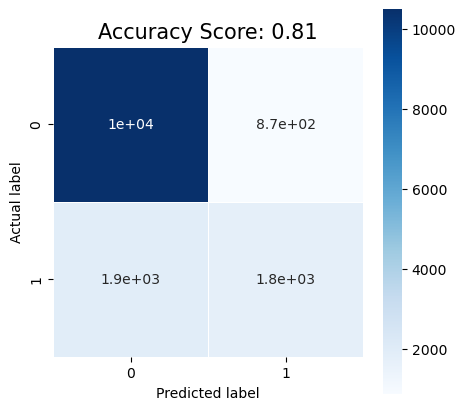

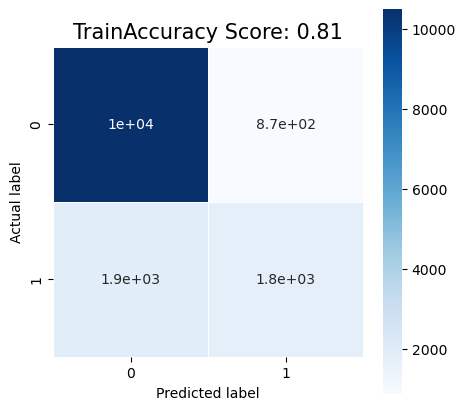

In [256]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(x_test, y_test).round(2))
plt.title(all_sample_title, size = 15)

plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'TrainAccuracy Score: {0}'.format(classifier.score(x_train, y_train).round(2))
plt.title(all_sample_title, size = 15)

In [257]:
print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88     11360
        >50K       0.67      0.47      0.56      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.70      0.72     15060
weighted avg       0.80      0.81      0.80     15060

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88     22653
        >50K       0.67      0.47      0.56      7508

    accuracy                           0.81     30161
   macro avg       0.76      0.70      0.72     30161
weighted avg       0.80      0.81      0.80     30161



In [258]:
y_test.value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [259]:
# check null accuracy score

null_accuracy = (6798/(6798+2251))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7512


model accuracy is 81 and null accuracy is 75 so its a good model

### Hyperparameter Tuning to improve Accuracy

In [260]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [261]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=5, 
                                    random_state=999)

In [262]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


In [263]:
gs_NB.best_params_

{'var_smoothing': 0.8111308307896871}

In [264]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

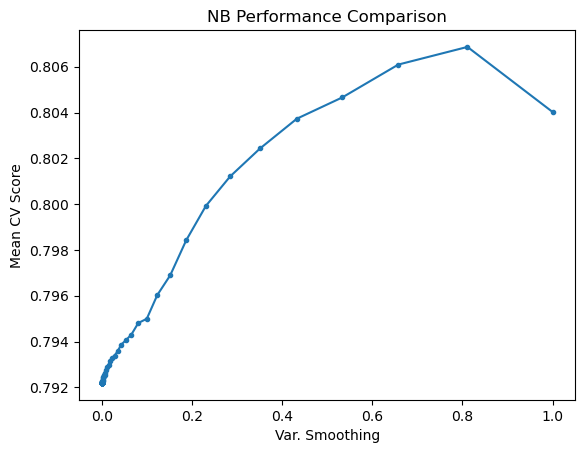

In [265]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [266]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8071049136786188


### Cross Validation

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [268]:
k_folds = KFold(n_splits = 20)

scores = cross_val_score(classifier, x_test, y_test, cv = k_folds)

In [269]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.79282869 0.81142098 0.812749   0.8061089  0.81540505 0.84329349
 0.79150066 0.83399734 0.81142098 0.80212483 0.81009296 0.81142098
 0.82337317 0.81938911 0.82602922 0.80212483 0.812749   0.79681275
 0.812749   0.83930943]
Average CV Score:  0.8137450199203184
Number of CV Scores used in Average:  20


In [270]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(classifier, x_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8520


10-fold cross-validation accuracy does not result in performance improvement for this model.

This model having a good perforance with accurracy of 81.
Test and train set accuracy is 81 so there is no chance of overfitting or underfitting.
Null accuracy is .75 which shows the model is good in predicting class labels.
ROC AUC is near to 1 which shows the model prediction is good.
Hyper parameter turning and cross validation doesn't improve performance.